In [1]:
# Import essential libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading Dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:

X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

Here we see there are 50000 training images and 10000 test images

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
# Let's plot some images to see what they are

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

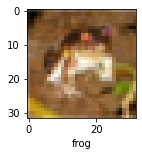

In [12]:
plot_sample(X_train, y_train, 0)

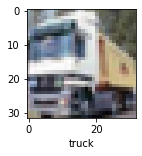

In [13]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255


Normalizing the training data

In [14]:
# Feature Scaling

X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
# Build simple artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9325 - accuracy: 0.3057
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6389 - accuracy: 0.4198
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5466 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4888 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4287 - accuracy: 0.4970


You can see that at the end of 5 epochs, accuracy is at around 49.70%



In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.35      0.47      1000
           1       0.72      0.46      0.56      1000
           2       0.34      0.36      0.35      1000
           3       0.34      0.39      0.36      1000
           4       0.59      0.19      0.29      1000
           5       0.44      0.32      0.37      1000
           6       0.34      0.81      0.48      1000
           7       0.62      0.49      0.55      1000
           8       0.51      0.72      0.60      1000
           9       0.56      0.55      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



Now let us build a convolutional neural network to train our images

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6811 - accuracy: 0.3856
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1374 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9728 - accuracy: 0.6640
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8706 - accuracy: 0.6950
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7997 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7428 - accuracy: 0.7404
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6995 - accuracy: 0.7557
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6388 - accuracy: 0.7746
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5954 - accuracy: 0.7931
Epoch 10/10
1563/1563 [==============================] - 43s 27m

With CNN, at the end 5 epochs, accuracy was at around 72.02% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9383 - accuracy: 0.6999


[0.9382729530334473, 0.6998999714851379]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.8602136e-03, 2.6721706e-05, 2.4089853e-05, 9.8806936e-01,
        6.6052548e-06, 9.2576696e-03, 6.2819786e-04, 6.3117193e-07,
        1.2213099e-04, 4.3348859e-06],
       [4.1530791e-04, 3.7072338e-02, 4.0786476e-06, 3.4996600e-07,
        4.0519677e-09, 7.7524005e-09, 1.2077852e-08, 7.8917743e-09,
        9.5863867e-01, 3.8692995e-03],
       [4.0618550e-02, 3.5735244e-01, 1.8211185e-04, 2.9862396e-04,
        1.0737726e-03, 3.0277672e-04, 2.5117654e-06, 1.6137985e-04,
        5.5351520e-01, 4.6492647e-02],
       [9.7867966e-01, 1.3611939e-02, 1.7608766e-03, 1.9353164e-04,
        2.4488688e-04, 9.3465869e-06, 3.3598937e-04, 4.0481509e-06,
        3.6564309e-03, 1.5032769e-03],
       [6.8368848e-07, 1.2756647e-04, 3.7722804e-02, 1.2991557e-01,
        3.9897633e-01, 1.0269432e-02, 4.2278793e-01, 1.6132195e-05,
        1.6527466e-04, 1.8249968e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

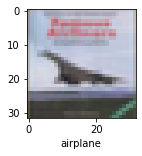

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'

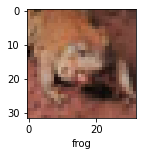

In [26]:
plot_sample(X_test, y_test,5)

In [27]:
classes[y_classes[5]]

'frog'

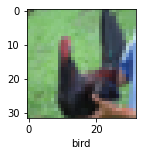

In [35]:
plot_sample(X_test, y_test,25)

In [36]:
classes[y_classes[25]]

'bird'

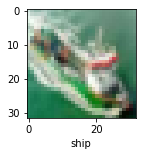

In [29]:
plot_sample(X_test, y_test,15)

In [32]:
classes[y_classes[15]]

'ship'

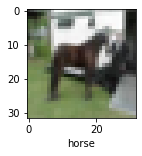

In [30]:
plot_sample(X_test, y_test,20)

In [33]:
classes[y_classes[20]]

'horse'

## Exercise

Use CNN to do handwritten digits classification using MNIST dataset.

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN.

In [37]:
# Import essential Libraries 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [38]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_test.shape

(10000, 28, 28)

In [41]:
X_train[0].shape

(28, 28)

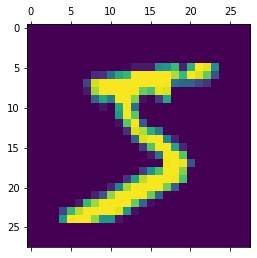

In [42]:
plt.matshow(X_train[0])

In [43]:
y_train[0]

5

In [44]:
# Feature Scaling

X_train = X_train / 255
X_test = X_test / 255

In [45]:
# Using ANN for classification

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4502 - accuracy: 0.8724
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1357 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0874 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0384 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0262 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [47]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 827us/step - loss: 0.0785 - accuracy: 0.9780


[0.0785425677895546, 0.9779999852180481]

In [48]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [49]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [50]:
# Using CNN for classification

In [51]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2906 - accuracy: 0.9160
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0534 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0144 - accuracy: 0.9953


In [53]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0423 - accuracy: 0.9866


[0.04228837415575981, 0.9865999817848206]